# Testando o yfinance do yahoo

In [30]:
import yfinance as yf
import pandas as pd
from matplotlib import pyplot as plt

In [31]:
# Salvando nomes para consulta
ggbr4 = yf.Ticker('GGBR4.SA')
ggbr3 = yf.Ticker('GGBR3.SA')
vale3 = yf.Ticker('VALE3.SA')
usim5 = yf.Ticker('USIM5.SA')
csna3 = yf.Ticker('CSNA3.SA')


In [32]:
# Obtendo histórico da ação nos últimos 10 anos
hggbr4 = ggbr4.history(period="10y")
hggbr3 = ggbr3.history(period="10y")
hvale3 = vale3.history(period="10y")
husim5 = usim5.history(period="10y")
hcsna5 = csna3.history(period="10y")
consulta = [hggbr4, hggbr3, hvale3, husim5, hcsna5]


Text(0.5, 1.0, 'Evolução do valor das ações nos últimos 10a.')

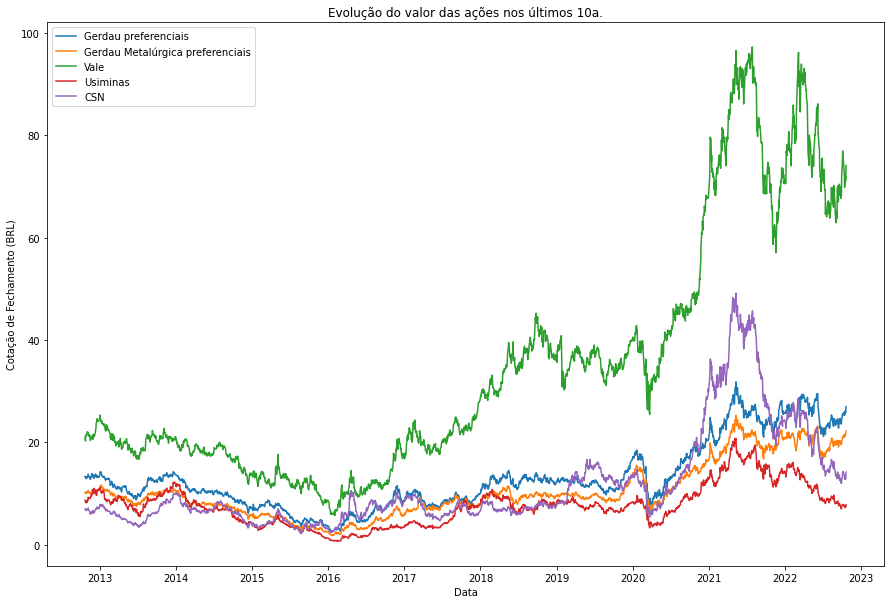

In [33]:
# Plotando gráfico
plt.figure(figsize=(15,10))
for hist in consulta:
    plt.plot(hist['Close'])
plt.legend(['Gerdau preferenciais', 'Gerdau Metalúrgica preferenciais', 'Vale', 'Usiminas', 'CSN',])
plt.ylabel(f'Cotação de Fechamento ({vale3.info["currency"]})')
plt.xlabel('Data')
plt.title('Evolução do valor das ações nos últimos 10a.')


Vale e CSN tiveram um melhor desempenho.

## Agora mesmo gráfico, só que com o dividendos:

In [34]:
# Agrupando (somando) os dividendos por ano
dggbr4 = hggbr4['Dividends'].resample('Y').sum()
dggbr3 = hggbr3['Dividends'].resample('Y').sum()
dvale3 = hvale3['Dividends'].resample('Y').sum()
dusim5 = husim5['Dividends'].resample('Y').sum()
dcsna5 = hcsna5['Dividends'].resample('Y').sum()
consulta = [dggbr4, dggbr3, dvale3, dusim5, dcsna5]

Text(0.5, 1.0, 'Pagamento de Anual de Dividentos')

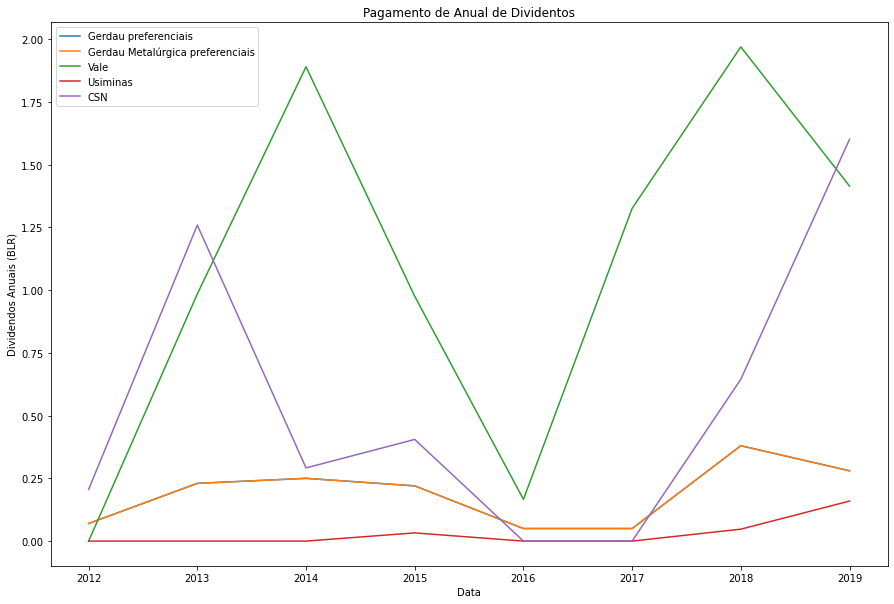

In [51]:
# Plotando
plt.figure(figsize=(15,10))
for empresa in consulta:
    plt.plot(empresa.index.year[:-3], empresa[:-3],label='...')
    plt.legend()
    plt.xlabel('Data')
    plt.ylabel('Dividendos Anuais (BLR)')
plt.legend(['Gerdau preferenciais', 'Gerdau Metalúrgica preferenciais', 'Vale', 'Usiminas', 'CSN'])
plt.title('Pagamento de Anual de Dividentos')



Podemos notar que as empresas que mais pagaram dividendos, foram a a VALE3 e a CSN3